# Text Mining

## Contents <a id=ov>
1. [Data Set](#data)
2. [Wordbook sentiment](#wordbook)
3. [Topic Modeling](#lda)





## Data Set <a id=data>
[Back to Content Overview](#ov)

The data set consists of all speeches of high ranking ECB representatives. (https://www.ecb.europa.eu/press/key/html/downloads.en.html)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm

In [2]:
#Import data from a excel_file
df=pd.read_csv('all_ECB_speeches.csv',sep='|')
print(df)

            date              speakers  \
0     2023-02-27                   NaN   
1     2023-02-16        Philip R. Lane   
2     2023-02-16         Fabio Panetta   
3     2023-02-15     Christine Lagarde   
4     2023-02-07                   NaN   
...          ...                   ...   
2656  1997-05-13  Alexandre Lamfalussy   
2657  1997-04-30  Alexandre Lamfalussy   
2658  1997-04-22  Alexandre Lamfalussy   
2659  1997-03-10  Alexandre Lamfalussy   
2660  1997-02-07  Alexandre Lamfalussy   

                                                  title  \
0     Macro-Financial Stability in the EU: Some Less...   
1     The euro area hiking cycle: an interim assessment   
2                Monetary policy after the energy shock   
3     European Parliament plenary debate on the ECB ...   
4          Monetary policy in times of pandemic and war   
...                                                 ...   
2656  The European Central Bank: independent and acc...   
2657  The operation of 

In [3]:
# Take a small sample to test you code efficiently.
df=df.sample(frac=0.1)

In [4]:
# Change the index to apply time series methods
df.index=pd.to_datetime(df['date'])
print(df)

                  date                  speakers  \
date                                               
2015-09-23  2015-09-23              Mario Draghi   
2001-04-04  2001-04-04    Eugenio Domingo Solans   
2008-09-03  2008-09-03  Gertrude Tumpel-Gugerell   
2017-11-20  2017-11-20     Sabine Lautenschläger   
2012-11-07  2012-11-07              Mario Draghi   
...                ...                       ...   
2013-05-24  2013-05-24          Vítor Constâncio   
2019-11-11  2019-11-11               Yves Mersch   
2017-01-24  2017-01-24     Sabine Lautenschläger   
2004-01-29  2004-01-29       Jean-Claude Trichet   
2001-10-17  2001-10-17      Willem F. Duisenberg   

                                                        title  \
date                                                            
2015-09-23  President's introductory remarks at the regula...   
2001-04-04  La puesta en circulación de los billetes y mon...   
2008-09-03  Speech at the EPC Coordination Committee offsi...  

In [5]:
print(df.resample('M').count())

            date  speakers  title  subtitle  contents
date                                                 
1997-10-31     1         1      1         1         1
1997-11-30     0         0      0         0         0
1997-12-31     0         0      0         0         0
1998-01-31     0         0      0         0         0
1998-02-28     1         1      1         1         1
...          ...       ...    ...       ...       ...
2022-07-31     0         0      0         0         0
2022-08-31     1         1      1         1         1
2022-09-30     1         1      1         1         1
2022-10-31     0         0      0         0         0
2022-11-30     1         1      1         1         1

[302 rows x 5 columns]


Text(0.5, 1.0, 'Articles per Month')

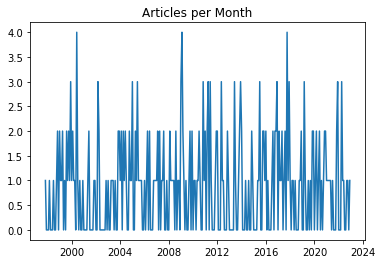

In [6]:
#Plot the Articles per Month
plt.plot(df.resample('M').count()['date'])
plt.title('Articles per Month')

In [ ]:
fig =go.Figure(go.Bar(x=))

## Word book sentiment

The easiest way to measure the sentiment of texts is to count prelabeled keywords:

In [7]:
# Load the wordbook file
word_book=pickle.load(open('newwordbook.p','rb'))


In [ ]:
for i,item in word_book:
    print(item)

<span style="color:blue"><b>Task:</b></span> Convert this word_book object in a more useful data structure!

In [8]:
word_book_dict = {key:words for key, words in word_book}
print(word_book_dict)

{'negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adve

<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts and save the sum of hits in separate columns!

In [9]:
# Iterate over ["negative", "positive","uncertainty"]
cat = ["negative", "positive","uncertainty"]

for item in cat: 
    #iterate over all texts
    count_per_cat=[]
    for text in tqdm(df['contents'], desc=item):
        count_per_text = 0
        #Iterate over all Words in the word_book
        for word in word_book_dict[item]:
            count_per_text+=str(text).count(word)
            
        count_per_cat.append(count_per_text)
    df[item] = count_per_cat


uncertainty: 100%|██████████| 266/266 [00:00<00:00, 310.65it/s]


In [ ]:
for item in cat:
    df[cath]=[sum(str(text).count(word) for word in word_book_dict[item] for text in tqdm(df['contents'], desc=item))]

In [10]:
# Aggregate the data monthly
df_m=df.resample('M').sum()
print(df_m)

            negative  positive  uncertainty
date                                       
1997-10-31       138       139           68
1997-11-30         0         0            0
1997-12-31         0         0            0
1998-01-31         0         0            0
1998-02-28       138       106           87
...              ...       ...          ...
2022-07-31         0         0            0
2022-08-31       162        25           67
2022-09-30       162        47           46
2022-10-31         0         0            0
2022-11-30        37        18           25

[302 rows x 3 columns]


<ipython-input-10-66a495a24e88>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_m=df.resample('M').sum()


<span style="color:blue"><b>Task:</b></span> Calculate the monthly tone. (``TONE = (#POS - #NEG) / (#POS + #NEG)``)

In [13]:
df_m['Tone'] = (df_m["positive"] - df_m["negative"] )/ (df_m["positive"] + df_m["negative"] )
print(df_m['Tone'])

date
1997-10-31    0.003610
1997-11-30         NaN
1997-12-31         NaN
1998-01-31         NaN
1998-02-28   -0.131148
                ...   
2022-07-31         NaN
2022-08-31   -0.732620
2022-09-30   -0.550239
2022-10-31         NaN
2022-11-30   -0.345455
Freq: M, Name: Tone, Length: 302, dtype: float64


<span style="color:blue"><b>Task:</b></span> Plot the monthly tone.

In [17]:
fig = go.Figure(go.Scatter(x=df_m.index, y=df_m['Tone'], mode='lines'))
fig

<span style="color:blue"><b>Task:</b></span> Plot the 12-month rolling window mean of the monthly tone.

In [19]:
vector = np.nan

for d in range(11, len(df_m)):
    vector[d]=df_m['Tone'][d-11:d+1].mean()
df_m['Tone_12'] = vector
fig = go.Figure(go.Scatter(x=df_m.index, y=df_m['Tone_12']))
fig

TypeError: 'float' object does not support item assignment

## Topic Modeling <a id=lda>
[Back to Content Overview](#ov)

### Document Frequency Matrix
The Document Frequency Matrix has the dimensions D X V, where D is the number of documents and V the size of the vocabulary (Number of unique word in the Corpus).
It saves the total count of every word in every document and is usually very sparse.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer(min_df=2)
df=df.dropna(subset=['contents'])
dtm = cv.fit_transform(df['contents'])
print('DTM created')

DTM created


In [26]:
print(dtm)

  (0, 8144)	2
  (0, 5937)	2
  (0, 8906)	2
  (0, 1044)	6
  (0, 10557)	111
  (0, 8811)	1
  (0, 3537)	2
  (0, 5215)	5
  (0, 10011)	1
  (0, 1663)	5
  (0, 6644)	1
  (0, 3421)	1
  (0, 7382)	43
  (0, 3524)	4
  (0, 1606)	1
  (0, 201)	1
  (0, 9510)	2
  (0, 172)	1
  (0, 7047)	1
  (0, 1862)	1
  (0, 5342)	1
  (0, 6755)	1
  (0, 3541)	9
  (0, 807)	45
  (0, 6989)	9
  :	:
  (261, 5489)	1
  (261, 7707)	1
  (261, 406)	1
  (261, 4296)	1
  (261, 4368)	1
  (261, 4892)	1
  (261, 5584)	1
  (261, 899)	1
  (261, 2988)	1
  (261, 4739)	3
  (261, 11051)	1
  (261, 10702)	1
  (261, 6873)	1
  (261, 11572)	1
  (261, 7593)	1
  (261, 8647)	1
  (261, 11569)	1
  (261, 9403)	1
  (261, 9363)	1
  (261, 1703)	12
  (261, 10786)	1
  (261, 10703)	1
  (261, 5143)	1
  (261, 4832)	1
  (261, 10366)	1


In [35]:
print(cv.get_feature_names_out())

['00' '000' '01' ... 'überwachen' 'überwachung' 'œuvre']


### Estimate LDA Model

The most frequently used topic model is the Latent Dirichlet Allocation (LDA).

#### The algorithm
Look into lda_gibbs.py

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
K=12
LDA = LatentDirichletAllocation(n_components=K,n_jobs=-1,max_iter=100,verbose=1)
LDA.fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

LatentDirichletAllocation(max_iter=100, n_components=12, n_jobs=-1, verbose=1)

### Word Clouds

In [37]:
max_words=100
voc=cv.get_feature_names_out()
print(voc)

['00' '000' '01' ... 'überwachen' 'überwachung' 'œuvre']


In [38]:
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

     |████████████████████████████████| 160 kB 3.7 MB/s eta 0:00:01


{'de': 1552.44, 'la': 607.12, 'en': 444.03, 'el': 439.08, 'los': 378.08, 'las': 331.08, 'que': 329.11, 'del': 274.07, 'con': 139.08, 'para': 136.08, 'se': 120.59, 'por': 106.08, 'al': 106.06, 'peseta': 97.08, 'un': 95.09, 'liquidez': 95.08, 'una': 95.08, 'no': 91.23, 'mercado': 91.08, 'ha': 90.08, 'es': 90.08, 'euro': 74.0, 'entidades': 67.08, 'política': 65.08, 'su': 63.08, 'banco': 61.65, 'operaciones': 61.08, 'monetaria': 61.08, 'como': 59.08, 'lo': 55.08, 'bce': 52.08, 'crédito': 51.08, 'sus': 50.08, 'plazo': 49.08, 'este': 48.08, 'eurosistema': 48.08, 'más': 48.08, 'han': 46.08, 'precios': 44.08, 'billetes': 44.08, 'interés': 43.08, 'monetario': 41.08, 'gold': 39.36, 'mercados': 39.08, 'sobre': 38.08, 'euros': 37.08, 'información': 37.08, 'tipos': 36.08, 'central': 35.38, 'monedas': 34.08, 'españa': 33.54, 'bancos': 32.08, 'desde': 31.08, 'entre': 30.1, 'marco': 30.08, 'financiación': 30.08, 'pesetas': 30.08, 'centrales': 27.08, 'operativo': 27.08, 'turbulencias': 26.08, 'sin': 26

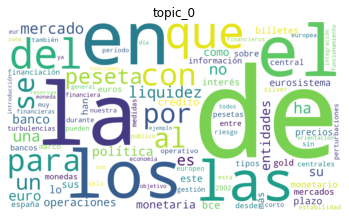

{'grado': 0.08, 'belgië': 0.08, 'belgique': 0.08, 'resemblance': 0.08, 'indefinite': 0.08, 'taxonomy': 0.08, '150th': 0.08, 'tallinn': 0.08, 'dates': 0.08, 'environmentally': 0.08, 'nationale': 0.08, 'celebration': 0.08, 'importe': 0.08, 'ambitiously': 0.08, 'banka': 0.08, 'eurofi': 0.08, 'recognized': 0.08, 'slovakia': 0.08, 'warmest': 0.08, 'intervenir': 0.08, 'dedication': 0.08, 'harmonization': 0.08, 'enjoys': 0.08, 'agrees': 0.08, 'footprint': 0.08, 'throw': 0.08, 'quota': 0.08, 'disseminating': 0.08, 'identifier': 0.08, 'discretions': 0.08, 'wanting': 0.08, 'cyberattacks': 0.08, 'alles': 0.08, 'vague': 0.08, 'belgium': 0.08, 'personal': 0.08, 'congratulate': 0.08, 'baton': 0.08, 'panellists': 0.08, 'waivers': 0.08, 'fencing': 0.08, 'ring': 0.08, 'cyber': 0.08, 'luz': 0.08, 'daunting': 0.08, 'engagements': 0.08, 'improbable': 0.08, 'seconds': 0.08, 'masks': 0.08, 'prisoner': 0.08, 'threefold': 0.08, 'opted': 0.08, 'uptake': 0.08, 'mrel': 0.08, 'dlt': 0.08, 'roundtable': 0.08, 'cel

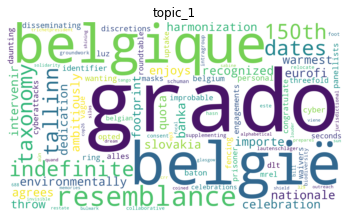

{'payments': 519.03, 'payment': 450.52, 'digital': 409.08, 'to': 302.23, 'for': 242.1, 'services': 235.67, 'and': 234.85, 'retail': 183.49, 'settlement': 179.59, 'be': 165.17, 'are': 139.91, 'would': 137.1, 'european': 126.96, 'money': 125.58, 'will': 117.93, 'service': 113.29, 'market': 112.36, 'instant': 111.08, 'we': 110.62, 'euro': 101.96, 'eurosystem': 101.35, 'users': 98.46, 'providers': 96.72, 'infrastructure': 92.12, 'or': 91.17, 'cash': 85.57, 'they': 81.39, 'use': 75.93, 'on': 70.88, 'solutions': 69.23, 'that': 67.36, 'innovation': 66.25, 'as': 65.77, 'clearing': 64.73, 'transactions': 60.11, 'industry': 59.88, 'you': 59.48, 'pan': 56.79, 'the': 52.71, 'technology': 48.63, 'infrastructures': 48.41, 'not': 45.35, 'technical': 45.21, 'user': 44.08, 'access': 44.03, 'sepa': 43.39, 'it': 43.04, 'online': 43.0, 'commission': 41.68, 'their': 40.66, 'digitalisation': 39.92, 'pay': 39.19, 'customer': 38.3, 'new': 38.09, 'people': 37.75, 'person': 37.44, 'means': 36.67, 'europe': 36.6

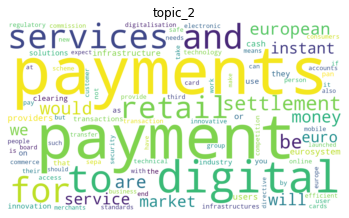

{'his': 43.44, 'he': 26.67, 'juncker': 18.05, 'jean': 14.6, 'president': 14.06, 'claude': 13.69, 'mr': 13.08, 'je': 6.79, 'minister': 6.79, 'prize': 6.66, 'ich': 6.23, 'eurogroup': 5.94, 'présidente': 5.08, 'européen': 5.0, 'counterfeiting': 4.97, 'madame': 4.85, 'upside': 4.83, 'prime': 4.77, 'möchte': 4.49, 'surrounded': 4.28, 'luxemburg': 4.07, 'votre': 4.05, 'notre': 3.92, 'man': 3.78, 'economique': 3.78, 'career': 3.57, 'award': 3.48, 'administered': 3.41, 'mesdames': 3.39, 'messieurs': 3.39, 'réjouis': 3.08, 'rencontre': 3.08, 'devant': 2.98, 'leadership': 2.88, 'fragen': 2.77, 'quote': 2.57, 'vigilance': 2.53, 'dialogue': 2.43, 'einige': 2.39, 'moderating': 2.36, 'webcasts': 2.08, 'danach': 2.08, 'trichet': 2.07, 'différentes': 2.07, 'lion': 2.07, 'secretary': 2.05, 'shoulder': 2.02, 'tribute': 2.0, 'ecbbrussels': 1.99, 'beispiel': 1.98, 'grave': 1.92, 'themen': 1.91, 'dual': 1.91, 'décisions': 1.75, 'exceptionally': 1.73, 'chairman': 1.7, 'unchanged': 1.58, 'concerted': 1.57, '

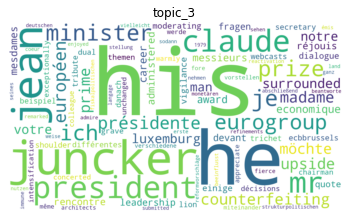

{'sepa': 97.77, 'target2': 76.08, 'direct': 68.87, 'target': 60.63, 'border': 54.1, 'cross': 49.66, 'balances': 41.59, 'debit': 37.08, 'national': 31.11, 'debits': 27.96, 'bank': 27.42, 'germany': 19.38, 'china': 18.07, 'asset': 17.76, 'app': 17.74, 'scheme': 17.18, 'central': 16.77, 'eur': 16.05, 'from': 15.28, 'end': 15.15, 'around': 15.12, 'balance': 14.87, 'migration': 14.86, 'purchase': 14.37, 'epc': 14.08, 'liquidity': 13.29, 'programme': 12.86, 'purchases': 12.45, 'billion': 12.42, 'bundesbank': 12.19, 'securities': 12.16, 'customers': 11.23, 'de': 11.09, 'spain': 11.03, 'flow': 10.8, 'total': 10.43, 'fragmentation': 10.3, 'net': 10.12, 'like': 10.07, 'date': 9.69, 'liability': 9.67, 'if': 9.54, 'solution': 9.1, 'españa': 9.07, 'country': 9.07, 'banco': 9.06, 'funding': 8.83, 'example': 8.73, 'money': 8.7, 'stakeholders': 8.54, 'settlement': 8.35, 'payments': 8.35, 'time': 8.32, 'legacy': 8.25, 'via': 8.12, 'interim': 8.04, 'regulation': 7.99, 'claim': 7.97, 'eurosystem': 7.95, 

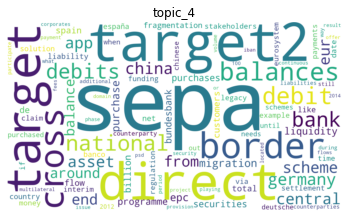

{'personal': 1.08, 'grado': 1.08, 'fase': 1.08, 'independencia': 0.08, 'estrategia': 0.08, 'alternativa': 0.08, 'objetivos': 0.08, 'elemento': 0.08, 'plano': 0.08, 'positivo': 0.08, 'considerar': 0.08, 'credibilidad': 0.08, 'responsabilidad': 0.08, 'directos': 0.08, 'ausencia': 0.08, 'inestabilidad': 0.08, 'tendría': 0.08, 'contención': 0.08, 'correcta': 0.08, 'dinero': 0.08, 'elevados': 0.08, 'inequívocamente': 0.08, 'derivadas': 0.08, 'clave': 0.08, 'prima': 0.08, 'adopción': 0.08, 'aparte': 0.08, 'parece': 0.08, 'proyecto': 0.08, 'comprensión': 0.08, 'requisitos': 0.08, 'actividad': 0.08, 'falta': 0.08, 'consecuencias': 0.08, 'relativa': 0.08, 'diversos': 0.08, 'constituyen': 0.08, 'analizar': 0.08, 'términos': 0.08, 'balance': 0.08, 'solans': 0.08, 'domingo': 0.08, 'eugenio': 0.08, 'ante': 0.08, 'derivados': 0.08, 'deberá': 0.08, 'unos': 0.08, 'empleo': 0.08, 'otra': 0.08, 'perspectiva': 0.08, 'adecuada': 0.08, 'dicha': 0.08, 'cuentas': 0.08, 'principal': 0.08, 'duda': 0.08, 'aplic

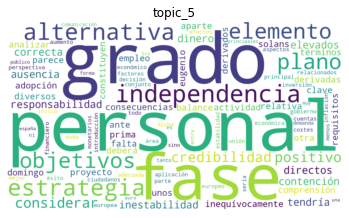

{'the': 56089.41, 'of': 28605.07, 'and': 21321.3, 'to': 20818.94, 'in': 19705.5, 'is': 8406.83, 'that': 8100.81, 'for': 7477.07, 'on': 5356.5, 'as': 5241.4, 'this': 5171.08, 'euro': 4980.62, 'be': 4644.0, 'financial': 4508.87, 'by': 4501.51, 'policy': 4193.08, 'are': 4152.26, 'have': 3877.62, 'monetary': 3866.08, 'with': 3861.86, 'it': 3849.12, 'area': 3517.97, 'has': 3305.08, 'at': 3021.58, 'we': 2882.55, 'will': 2860.22, 'which': 2695.08, 'not': 2651.82, 'an': 2624.03, 'economic': 2527.08, 'ecb': 2504.08, 'stability': 2455.08, 'from': 2452.89, 'banks': 2436.08, 'market': 2244.8, 'european': 2189.19, 'also': 2174.51, 'more': 2139.08, 'central': 2135.1, 'inflation': 2049.69, 'our': 1968.08, 'price': 1903.08, 'growth': 1829.08, 'countries': 1779.08, 'been': 1762.08, 'bank': 1721.69, 'markets': 1689.08, 'these': 1688.81, 'its': 1657.08, 'can': 1647.25, 'their': 1632.51, 'would': 1578.07, 'but': 1563.09, 'or': 1490.89, 'should': 1475.75, 'was': 1455.54, 'all': 1424.02, 'there': 1284.08, '

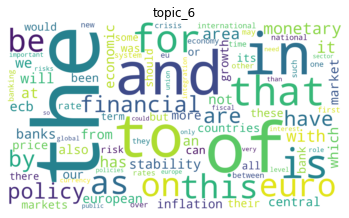

{'de': 460.91, 'la': 333.71, 'et': 181.89, 'le': 175.08, 'des': 167.44, 'les': 165.24, 'en': 151.8, 'di': 136.08, 'euro': 116.67, 'il': 110.08, 'que': 102.05, 'dans': 100.08, 'un': 92.0, 'in': 81.35, 'une': 79.08, 'pour': 76.08, 'est': 75.08, 'du': 66.81, 'che': 64.08, 'plus': 54.55, 'par': 51.63, 'pas': 51.08, 'zone': 50.98, 'qui': 45.08, 'ne': 42.01, 'monétaire': 41.08, 'au': 40.08, 'non': 37.89, 'sur': 36.08, 'per': 35.93, 'se': 35.42, 'ce': 35.08, 'si': 34.09, 'pays': 33.73, 'europe': 33.07, 'change': 32.9, 'monnaie': 32.08, 'stabilité': 32.08, 'je': 31.35, 'qu': 29.08, 'taux': 29.08, 'on': 28.84, 'del': 27.69, 'politique': 27.08, 'comme': 27.08, 'ou': 26.08, 'internationale': 25.02, 'ces': 24.05, 'bce': 23.09, 'sont': 23.08, 'européenne': 23.08, 'cette': 22.08, 'aux': 20.08, 'rôle': 20.08, 'années': 20.08, 'économique': 20.08, 'même': 17.98, 'aussi': 17.08, 'dei': 17.08, 'international': 16.7, 'leur': 16.08, 'peut': 16.08, 'vous': 16.08, 'union': 15.75, 'mais': 15.08, 'avec': 15.0

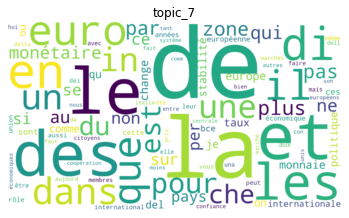

{'grado': 0.08, 'belgië': 0.08, 'belgique': 0.08, 'resemblance': 0.08, 'indefinite': 0.08, 'taxonomy': 0.08, '150th': 0.08, 'tallinn': 0.08, 'dates': 0.08, 'environmentally': 0.08, 'nationale': 0.08, 'celebration': 0.08, 'importe': 0.08, 'ambitiously': 0.08, 'banka': 0.08, 'eurofi': 0.08, 'recognized': 0.08, 'slovakia': 0.08, 'warmest': 0.08, 'intervenir': 0.08, 'dedication': 0.08, 'harmonization': 0.08, 'enjoys': 0.08, 'agrees': 0.08, 'footprint': 0.08, 'throw': 0.08, 'quota': 0.08, 'disseminating': 0.08, 'identifier': 0.08, 'discretions': 0.08, 'wanting': 0.08, 'cyberattacks': 0.08, 'alles': 0.08, 'vague': 0.08, 'belgium': 0.08, 'personal': 0.08, 'congratulate': 0.08, 'baton': 0.08, 'panellists': 0.08, 'waivers': 0.08, 'fencing': 0.08, 'ring': 0.08, 'cyber': 0.08, 'luz': 0.08, 'daunting': 0.08, 'engagements': 0.08, 'improbable': 0.08, 'seconds': 0.08, 'masks': 0.08, 'prisoner': 0.08, 'threefold': 0.08, 'opted': 0.08, 'uptake': 0.08, 'mrel': 0.08, 'dlt': 0.08, 'roundtable': 0.08, 'cel

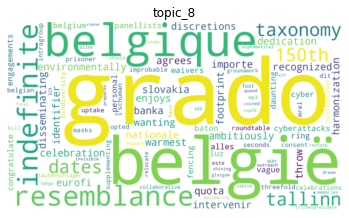

{'die': 813.07, 'der': 652.08, 'und': 496.08, 'in': 277.41, 'zu': 222.08, 'den': 185.03, 'für': 178.08, 'auf': 176.08, 'von': 152.49, 'des': 151.72, 'im': 145.08, 'ist': 143.08, 'eine': 130.08, 'nicht': 116.08, 'es': 113.08, 'auch': 112.08, 'mit': 112.03, 'das': 104.08, 'werden': 98.08, 'dass': 93.08, 'sich': 84.08, 'ein': 79.08, 'als': 78.08, 'hat': 74.08, 'wir': 74.08, 'haben': 71.08, 'dem': 69.08, 'ezb': 64.08, 'einer': 64.08, 'zur': 62.08, 'sind': 60.08, 'krise': 60.08, 'ich': 59.94, 'um': 59.08, 'wie': 59.08, 'an': 57.79, 'währungsunion': 56.08, 'sie': 54.08, 'wird': 48.08, 'durch': 45.08, 'euro': 44.17, 'dies': 43.08, 'bei': 42.08, 'europäischen': 41.08, 'diese': 41.08, 'vor': 39.08, 'noch': 39.08, 'wurde': 39.08, 'war': 38.3, 'nur': 37.08, 'so': 36.7, 'müssen': 36.08, 'einem': 36.08, 'aus': 35.08, 'aber': 35.08, 'maßnahmen': 34.08, 'geldpolitik': 33.08, 'können': 33.08, 'mitgliedstaaten': 33.08, 'eu': 30.78, 'wirtschafts': 29.08, 'über': 29.08, 'ihre': 29.08, 'einen': 28.08, 'ka

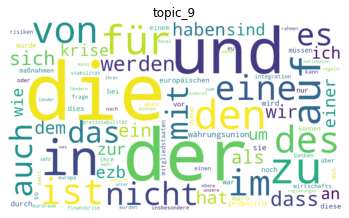

{'grado': 0.08, 'belgië': 0.08, 'belgique': 0.08, 'resemblance': 0.08, 'indefinite': 0.08, 'taxonomy': 0.08, '150th': 0.08, 'tallinn': 0.08, 'dates': 0.08, 'environmentally': 0.08, 'nationale': 0.08, 'celebration': 0.08, 'importe': 0.08, 'ambitiously': 0.08, 'banka': 0.08, 'eurofi': 0.08, 'recognized': 0.08, 'slovakia': 0.08, 'warmest': 0.08, 'intervenir': 0.08, 'dedication': 0.08, 'harmonization': 0.08, 'enjoys': 0.08, 'agrees': 0.08, 'footprint': 0.08, 'throw': 0.08, 'quota': 0.08, 'disseminating': 0.08, 'identifier': 0.08, 'discretions': 0.08, 'wanting': 0.08, 'cyberattacks': 0.08, 'alles': 0.08, 'vague': 0.08, 'belgium': 0.08, 'personal': 0.08, 'congratulate': 0.08, 'baton': 0.08, 'panellists': 0.08, 'waivers': 0.08, 'fencing': 0.08, 'ring': 0.08, 'cyber': 0.08, 'luz': 0.08, 'daunting': 0.08, 'engagements': 0.08, 'improbable': 0.08, 'seconds': 0.08, 'masks': 0.08, 'prisoner': 0.08, 'threefold': 0.08, 'opted': 0.08, 'uptake': 0.08, 'mrel': 0.08, 'dlt': 0.08, 'roundtable': 0.08, 'cel

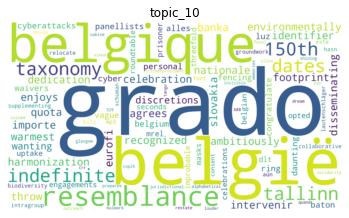

{'grado': 0.08, 'belgië': 0.08, 'belgique': 0.08, 'resemblance': 0.08, 'indefinite': 0.08, 'taxonomy': 0.08, '150th': 0.08, 'tallinn': 0.08, 'dates': 0.08, 'environmentally': 0.08, 'nationale': 0.08, 'celebration': 0.08, 'importe': 0.08, 'ambitiously': 0.08, 'banka': 0.08, 'eurofi': 0.08, 'recognized': 0.08, 'slovakia': 0.08, 'warmest': 0.08, 'intervenir': 0.08, 'dedication': 0.08, 'harmonization': 0.08, 'enjoys': 0.08, 'agrees': 0.08, 'footprint': 0.08, 'throw': 0.08, 'quota': 0.08, 'disseminating': 0.08, 'identifier': 0.08, 'discretions': 0.08, 'wanting': 0.08, 'cyberattacks': 0.08, 'alles': 0.08, 'vague': 0.08, 'belgium': 0.08, 'personal': 0.08, 'congratulate': 0.08, 'baton': 0.08, 'panellists': 0.08, 'waivers': 0.08, 'fencing': 0.08, 'ring': 0.08, 'cyber': 0.08, 'luz': 0.08, 'daunting': 0.08, 'engagements': 0.08, 'improbable': 0.08, 'seconds': 0.08, 'masks': 0.08, 'prisoner': 0.08, 'threefold': 0.08, 'opted': 0.08, 'uptake': 0.08, 'mrel': 0.08, 'dlt': 0.08, 'roundtable': 0.08, 'cel

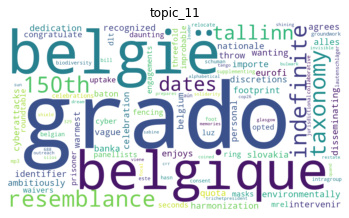

In [39]:
# Create Word Clouds
for t, topic in enumerate(LDA.components_):
    top_word_dict={voc[index]:topic[index] for index in np.argsort(-topic)[:max_words]}
    print({word: round(value,2) for word, value in top_word_dict.items()})
    wordcloud = WordCloud(max_words=max_words,
                          background_color="white",
                          collocations=False,
                          width=1920,
                          height=1080).generate_from_frequencies(top_word_dict)
    wordcloud.to_file("wordcloud_topic_"+str(t)+".pdf")
    plt.title("topic_"+str(t))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Spacy <a id=spacy>
[Back to Content Overview](#ov)

Spacy is a powerful library based on pre-trained language models. 

In [40]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en_core_web_sm
import spacy

     |████████████████████████████████| 6.9 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 815 kB/s eta 0:00:01
     |████████████████████████████████| 107 kB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 865 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 492 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 1.1 MB/s eta 0:00:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
# Define your language processing model
nlp = spacy.load("en_core_web_sm")
print(nlp)

In [42]:
print(df['contents'][0][:1000])

  President’s introductory remarks at the regular ECON hearing   Introductory statement by Mario Draghi, President of the ECB,Brussels, 23 September 2015 Mr Chairman, Honourable Members of the Economic and Monetary Affairs Committee, Ladies and gentlemen, During the summer break, our Union faced exceptional challenges. First, there was the long and complicated discussion on the new adjustment programme for Greece. And now, in an area very much outside the ECB’s competence, there is the challenge of harbouring a large number of refugees that had to leave their homes behind. Both these events – although very different in nature – have shown again that Europe can only be strong if it acts in unity on the basis of solidarity and cooperation. This is a lesson we should draw also for the challenges to come.  In my remarks today, I would like to discuss two main topics: first, our assessment of the latest economic developments and its implications for our monetary policy stance; second, the p

In [43]:
# Define the document object
doc=nlp(df['contents'][0])

In [44]:
#Iterate over sentences
for sent in doc.sents:
    print(sent)
    print('\n'*3)

  President’s introductory remarks at the regular ECON hearing   Introductory statement by Mario Draghi, President of the ECB,Brussels, 23 September 2015 Mr Chairman, Honourable Members of the Economic and Monetary Affairs Committee, Ladies and gentlemen, During the summer break, our Union faced exceptional challenges.




First, there was the long and complicated discussion on the new adjustment programme for Greece.




And now, in an area very much outside the ECB’s competence, there is the challenge of harbouring a large number of refugees that had to leave their homes behind.




Both these events – although very different in nature – have shown again that Europe can only be strong if it acts in unity on the basis of solidarity and cooperation.




This is a lesson we should draw also for the challenges to come.  




In my remarks today, I would like to discuss two main topics: first, our assessment of the latest economic developments and its implications for our monetary policy 

In [45]:
#Iterate over tokens
for token in doc[:25]:
    print((token.text+' '*15)[:15], (token.lemma_+' '*15)[:15], token.pos_, token.tag_, (token.dep_+' '*8)[:8],
            token.shape_, token.is_alpha, token.is_stop, sep='\t')

               	               	SPACE	_SP	dep     	  	False	False
President      	President      	PROPN	NNP	poss    	Xxxxx	True	False
’s             	’s             	PART	POS	case    	’x	False	True
introductory   	introductory   	ADJ	JJ	amod    	xxxx	True	False
remarks        	remark         	NOUN	NNS	nsubj   	xxxx	True	False
at             	at             	ADP	IN	prep    	xx	True	True
the            	the            	DET	DT	det     	xxx	True	True
regular        	regular        	ADJ	JJ	amod    	xxxx	True	False
ECON           	econ           	NOUN	NN	compound	XXXX	True	False
hearing        	hear           	VERB	VBG	compound	xxxx	True	False
               	               	SPACE	_SP	dep     	  	False	False
Introductory   	introductory   	ADJ	JJ	amod    	Xxxxx	True	False
statement      	statement      	NOUN	NN	pobj    	xxxx	True	False
by             	by             	ADP	IN	prep    	xx	True	True
Mario          	Mario          	PROPN	NNP	compound	Xxxxx	True	False
Draghi         	Draghi       

<span style="color:blue"><b>Task:</b></span> Create a string with only the nouns remaining in the article.

<span style="color:blue"><b>Task:</b></span> Lemmatize the text. Delete all non alpha and stop words.

### Excursus: Mulitprocessing
Spacy tokenizing is relatively slow, but the process can  be parallelized:

In [ ]:
from joblib import Parallel, delayed

First we have to split the data into batches, as loading the model in a sub-process for each document would be too costly.

In [ ]:
def make_batches(_list,n_batches=10):
    len_batch=len(_list)//n_batches+1
    return [_list[i*len_batch:min((i+1)*len_batch,len(_list))] for i in range(n_batches)]

In [ ]:
batches=make_batches(df['contents'],36)
print(batches)

Then we need to define a function that does the work in each sub-process.

In [ ]:
def lemmatizer(texts:list)->list:
    nlp = spacy.load("en_core_web_sm")
    return [' '.join([token.lemma_ for token in  nlp(text) if token.is_alpha]) for text in texts]

Now we can run the task in ``n_jobs`` parallel tasks. Select ``n_jobs`` just below your available threads (usually the number of CPU cores times two).

In [ ]:
results=Parallel(n_jobs=12,verbose=50)(delayed(lemmatizer)(batch) for batch in batches)
print(results)

In [ ]:
#Unpack the nested results
df['lemma'] =[lemma for batch in results for lemma in batch]

In [ ]:
print(df['lemma'])

<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts using muliple threads. (Batches are not required for optimal performance.)